### Basic Analysis of a dataset with data minipulation and visulaiztion

data uses NYC Flight13 dataset

#load the datasets
#dimensions of flights dataset in rows and columns
#column names of flights
#print types of each variable in the dataset
#select all unique destinations 
#view initial 10 rows in the dataset
#unique origin airports
#select the subset of the data where the destination is Seattle. Count such flights.

#unique airlines in the dataset
#carriers flying to Seattle
#Subset the dataset with destination as Seattle and then find unique Airplanes(using tailnums)

#calculate the mean by subsetting the data with destination as Seattle
#Make a crosstabulation of the flights coming from NYC to SEA
#Calculate the proportion by dividing the sum

#creating a groupby table which is indexed by Month and Day and not year because the data is for 2013 year
#the arrival delay is then aggregated for every date

#select the the date for largest average arrival delay
#groupby the number of flights only if there is departure delay (departure delay is greater than 0)
#retrieve the date for the maximum number of delayed flights



#plot the data by averaging the departure delay by months
#set the x-axis label to months
#set the x-axis to not plot 0 month
#increase the number of visible ticks to individual months to show all months
#set the y-label to average delay 
#set the limits of y-axis
#set the grid to true
#plot legends

In [217]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib

import sklearn
import matplotlib.pyplot as plt

from pandas import Series
#inline matplotlib
%matplotlib inline 

# Import StatsModels for OLS
import statsmodels.api as sm

# Load dataset. Assumes flights.zip has been unpacked and saved as flights.csv in the current directory
# Create dataframe from file 
flights_df = pd.read_csv('flights.csv')

In [218]:
#dimensions of flights dataset in rows and columns
print flights_df.shape

(336776, 17)


In [219]:
# flights_df.columns = [strip_non_ascii(x) for x in flights_df.columns]

#column names of flights
print flights_df.columns

Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')


In [220]:
#print types of each variable in the dataset
print flights_df.dtypes

Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [221]:
#select all unique destinations 
flights_df.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [222]:
#view initial 10 rows in the dataset
flights_df.head(10)


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [223]:
# filter dataset on 'dest' == 'SEA', to narrow all flights going to Seatac airport
print flights_df[flights_df['dest']=='SEA'].count()


Unnamed: 0    3923
year          3923
month         3923
day           3923
dep_time      3904
dep_delay     3904
arr_time      3903
arr_delay     3885
carrier       3923
tailnum       3917
flight        3923
origin        3923
dest          3923
air_time      3885
distance      3923
hour          3904
minute        3904
dtype: int64


It appears there were between 3903 and 3923 flights from NYC airports to Seattle in 2013. Some of the columns are missing values for some flights, leading to different counts. I put the likely number of completed SEA-bound flights at 3903, which is the number of flights that recorded an arrival time. Based on the data, I would speculate that 3923 flights were planned, as that many have a flight number, origin, destination, year/month/day, carrier, and distance. These are all fields that would be known at the time a flight was scheduled. However, it is likely that only completed flights would record an arrival time. Therefore I put the number at 3903, and presume that 20 of the 3923 scheduled flights were cancelled for one reason or another.

(b) How many airlines fly from NYC to Seattle?

In [224]:
# create an array of unique carriers with 'dest' == 'SEA' filter, then get the length of the array.

print 'Unique carriers:', flights_df[flights_df['dest']=='SEA'].carrier.unique()
print 'Number of unique carriers', len(flights_df[flights_df['dest']=='SEA'].carrier.unique())

Unique carriers: ['AS' 'DL' 'UA' 'B6' 'AA']
Number of unique carriers 5


Five different airlines fly from NYC ariports to Seattle (Seatac airport), and have the airline codes AS, DL, UA, B6, and AA. 

(c) How many unique air planes fly from NYC to Seattle?

In [225]:
# create an array of unique tailnums with 'dest' == 'SEA' filter, then get the length of the array.
print 'Number of unique planes:', len(flights_df[flights_df['dest']=='SEA'].tailnum.unique())

Number of unique planes: 936


In [226]:
#calculate the mean by subsetting the data with destination as Seattle
flights_df[(flights_df.dest=='SEA')].arr_delay.mean()

-1.0990990990990992

The average arrival delay of the flights flying from NYC to Seattle is -1.099. This can be approximated to -1.10. A negative value means that on average the flights flying from NYC to Seattle arrive "early" by 1.10 mins

(e) What proportion of flights to Seattle come from each NYC airport?

In [227]:
# take the mean of a list of arrival delays after filtering for 'dest' == SEA
print 'Avg arrival deviation:', flights_df[flights_df['dest'] == 'SEA'].arr_delay.mean() # include all flights
print 'Avg amount delayed:', flights_df[(flights_df['dest'] == 'SEA') & 
           (flights_df['arr_delay'] > 0)].arr_delay.mean() # include only "delayed" flights

Avg arrival deviation: -1.0990990991
Avg amount delayed: 39.7998423956


The average of the field 'arr_delay' on flights to Seattle is -1.1 minutes. This means that on average, flights to Seattle arrived earlier than scheduled. A more standard notion of delay is to describe the amount of time that late flights were delayed by. When looked at this way (by including only flights that had a positive arr_delay value), the average arrival delay on flights to Seattle was 39.8 minutes.

(e) What proportion of flights to Seattle come from each NYC airport?

In [228]:
# Create objects for proportion function
sea_flights = flights_df[flights_df['dest'] == 'SEA'] 
airports = sea_flights.origin.unique()
flight_denom = sea_flights.flight.count()

# Proportion function to print an airports proportion of flights (portion/total) to seattle given an airport
def flight_proportion(airport):
    for i in airport:
        print i, float(sea_flights[sea_flights['origin'] == i].flight.count()) / float(flight_denom) # change both numerator and denominator to float

# run function, passing in the unique NYC airports
print flight_proportion(airports)


EWR 0.466734641856
JFK 0.533265358144
None


Approximately 46.7% of New York to Seattle flights originate in Newark (EWR), and 53.3% originate at JFK airport. No flights were reported from LaGuardia (LGA). This is based on scheduled flight information, not completed flight records.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [229]:
# Add date column to df, concatenating year/month/day
flights_df['date'] = pd.to_datetime(flights_df['year'] * 10000 + flights_df['month'] * 100 + flights_df['day'], format='%Y%m%d')

# Filter for flights with a positive departure delay
dep_delay_flights = flights_df[flights_df['dep_delay'] > 0]
# first, create a new column called "date":
flights_df['date'] = pd.to_datetime((flights_df.year*10000+flights_df.month*100+flights_df.day).apply(str),format='%Y%m%d')

# we can check the new column by printing the head of the data frame:
# flights_df.head(10)

# use .groupby() to aggregate data for each date, then use .mean() to calculate average delay time
dep_delay = flights_df.groupby('date', as_index = False)['dep_delay'].mean()
arr_delay = flights_df.groupby('date', as_index = False)['arr_delay'].mean()

# print the rows that have maximum delay time for 2 new data frames
print(dep_delay.ix[dep_delay['dep_delay'].idxmax()])
print(arr_delay.ix[arr_delay['arr_delay'].idxmax()])



flights_by_date = flights_df.groupby(['year','month','day'])['dep_delay'].mean()
flights_by_date_max = flights_by_date.max()
flights3 = list(flights_by_date[flights_by_date == flights_by_date_max].index[0])
print ("Largest average departure delay is on:",flights3[1],'-',flights3[2],'-',flights3[0], 'with delay of', flights_by_date_max, 'mins' )

flights_by_date_arr = flights_df.groupby(['year','month','day'])['arr_delay'].mean()
flights_by_date_arr_max = flights_by_date_arr.max()
flights6 = list(flights_by_date_arr[flights_by_date_arr == flights_by_date_arr_max].index[0])
print ("Largest average arrival delay is on:",flights6[1],'-',flights6[2],'-',flights6[0], 'with delay of', flights_by_date_arr_max, 'mins' )

date         2013-03-08 00:00:00
dep_delay                83.5369
Name: 66, dtype: object
date         2013-03-08 00:00:00
arr_delay                85.8622
Name: 66, dtype: object
('Largest average departure delay is on:', 3, '-', 8, '-', 2013, 'with delay of', 83.536921151439302, 'mins')
('Largest average arrival delay is on:', 3, '-', 8, '-', 2013, 'with delay of', 85.86215538847118, 'mins')


The day with the higest average departure delay in 2013 was March 8, with 102.9 minutes. The highest average arrival delay occurred on July 10 (110.1 minutes). Early departures and arrivals (i.e. negative arr_delay and dep_delay values) were not considered in this analysis, as the question was interpreted to mean positively delayed flights.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [230]:
# using dep_delay_flights from before, group by date and aggregate by count
count_del_flights = dep_delay_flights.groupby('date').count()

# Order df by dep_delay, desc
del_count = count_del_flights.sort_values('dep_delay', ascending = 0)

# Extract column of interest
worst_days = del_count['dep_delay']

# Return results
print worst_days.head(3)

date
2013-12-23    674
2013-03-08    653
2013-07-01    652
Name: dep_delay, dtype: int64


The "worst day for delays" could take a couple different meanings: one, it could refer to the day with the highest average delays in minutes, which was March 8 (102.9 minutes delayed). Two, it could refer to the day with the highest number of delays, which was December 23 (674 delayed flights). I consider March 8th the "worst" day overall, because it had the highest average delay and the second highest number of delays, making the likelihood of delay great and the length of delay frustrating.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [231]:
flights_month = flights_df.groupby(['month'])['dep_delay'].mean()
print(flights_month)



month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64



To find the seasonal pattern, we find the average departure delay by month. From the data we find that July is the worst month to fly out of NYC as it has the maximum departure delay of 21.72 mins.

(d) On average, how do departure delays vary over the course of a day?

In [232]:
flights1 = flights_df
flights1['hour'] = flights1['hour'].replace([24], 0)
flights1 = flights_df.groupby(['hour'])['dep_delay'].mean()
print(flights1)



hour
0.0     126.609890
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
Name: dep_delay, dtype: float64


 The departure delays increase starting morning and then increases further during the afternoon and drops back again in the late evening.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [233]:
# create a new column "speed" that calculates the speed of each flight (in miles/minute)
flights_df['speed'] = flights_df['distance']/flights_df['air_time']

# sort and filter the data frame by descending speed values and wanted columns
sort_df = flights_df.sort_values(by = 'speed', ascending=False)
sort_df = sort_df[['carrier', 'tailnum', 'flight', 'origin', 'dest', 'date', 'speed']]

# return the first row, which has the highest flight speed
sort_df.head(1)

# ////////////////////////////////////////////////

# #Calculating speed(dis/time) of the flights
# flights_df['speed']=flights_df['distance']/flights_df['air_time']
# #sorting speed values
# flights_df = flights_df.sort_values(by='speed', ascending=[False])
# #printing the output 
# flights_df.head(3)


,carrier,tailnum,flight,origin,dest,date,speed
216447,DL,N666DN,1499,LGA,ATL,2013-05-25,11.723077


## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [234]:
#compute the speed variable. Divide the time by 60 because we are now 
#considering the speed which is measured in miles per hour
flights_df['speed'] = flights_df.distance / (flights_df.air_time/60)

#Find the row with the maximum flight speed
flights_df[(flights_df.speed == flights_df.speed.max())]



,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-05-25,703.384615


 Flight number 1499 flying from LaGuardia to Atlanta on 25th May flew the fastest with a speed of 703.38 MPH.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [235]:
# group by carrier, flight, dest, then print the combinations that there are 365 instances of (assuming 1/day)
for key, group in flights_df.groupby(['carrier', 'flight', 'dest']):
    if len(group) == 365:
        print key
        
flights_daily = flights_df[['Unnamed: 0','carrier','flight','dest']].groupby(['carrier','flight','dest']).agg('count')
flights_daily[flights_daily['Unnamed: 0']>=365]

('AA', 59, 'SFO')
('AA', 119, 'LAX')
('AA', 181, 'LAX')
('AA', 1357, 'SJU')
('AA', 1611, 'MIA')
('B6', 219, 'CLT')
('B6', 359, 'BUR')
('B6', 371, 'FLL')
('B6', 431, 'SRQ')
('B6', 703, 'SJU')
('B6', 1783, 'MCO')
('DL', 2159, 'MCO')
('DL', 2391, 'TPA')
('EV', 5712, 'IAD')
('UA', 15, 'HNL')
('VX', 251, 'LAS')
('VX', 407, 'LAX')
('VX', 413, 'LAX')


Unnamed: 0
carrier flight dest            
AA      59     SFO          365
        119    LAX          365
        181    LAX          365
        1357   SJU          365
        1611   MIA          365
B6      219    CLT          365
        359    BUR          365
        371    FLL          365
        431    SRQ          365
        703    SJU          365
        1783   MCO          365
DL      2159   MCO          365
        2391   TPA          365
EV      5712   IAD          365
UA      15     HNL          365
VX      251    LAS          365
        407    LAX          365
        413    LAX          365

There are 18 daily flights out of NYC: American Airlines has 5 fligts that service San Francisco, Los Angeles, San Juan (Puerto Rico), and Miami. Jet Blue operates 6 flights, serving Charlotte, Burbank, Fort Lauderdale, Sarasota, San Juan, and Orlando. Delta flies daily to Orlando and Tampa. ExpressJet services Washington, DC. United services Honolulu. And Virgin America flies daily to Las Vegas and Los Angeles.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


My research question: Which carrier airline has most frequency of arrival delay at the NYC airports and how does it compare with it's departure delay? This observation if relevant will help me to avoid picking that particular airline, especially if there is a close similarity in both it's arrival delay and departure delay pattern.

   carrier  arr_delay
0       9E       6637
1       AA      10706
2       AS        189
3       B6      23609
4       DL      16413
5       EV      24484
6       F9        392
7       FL       1895
8       HA         97
9       MQ      11693
10      OO         10
11      UA      22222
12      US       7349
13      VX       1746
14      WN       5304
15      YV        258


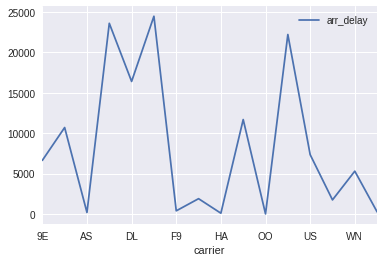

In [236]:
#finding the delayed arrival flights at NYC 
delayed_flights = flights_df[flights_df['arr_delay']>0]
#counting the total delayed arrival flights by carrier
delay_freq= delayed_flights.groupby('carrier', as_index=False)['arr_delay'].count()

print(delay_freq)
delay_freq = delay_freq.set_index('carrier')
delay_freq.plot()
plt.show()

So, the above plot shows EV has the most delayed arrival flights in overall. The above plot visualization also supports this finding as we can see from above. Next we can try to look for performance of delayed arrivals for the same airline to assess it's overall service quality

   carrier  dep_delay
0       9E       7063
1       AA      10162
2       AS        226
3       B6      21445
4       DL      15241
5       EV      23139
6       F9        341
7       FL       1654
8       HA         69
9       MQ       8031
10      OO          9
11      UA      27261
12      US       4775
13      VX       2225
14      WN       6558
15      YV        233


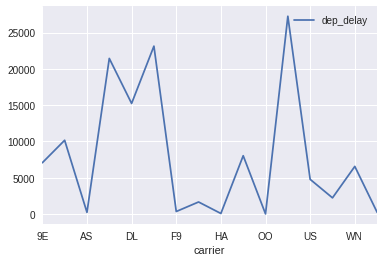

In [237]:
#finding the delayed arrival flights at NYC 
delayed_dep_flights = flights_df[flights_df['dep_delay']>0]
#counting the total delayed arrival flights by carrier
dep_delay_freq= delayed_dep_flights.groupby('carrier', as_index=False)['dep_delay'].count()

print(dep_delay_freq)
dep_delay_freq = dep_delay_freq.set_index('carrier')
dep_delay_freq.plot()
plt.show()

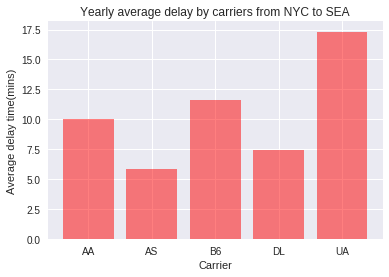

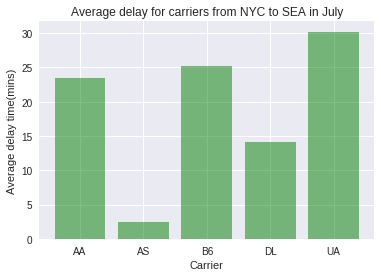

In [238]:
flights1 = flights_df
flights2 = flights1[(flights1['dest']=='SEA')]
flights3 = flights2.groupby(['carrier'])['dep_delay'].mean()
flights4 = flights1[(flights1['dest']=='SEA') & (flights1['month']==7)]
flights5 = flights4.groupby(['carrier'])['dep_delay'].mean()

index = np.arange(len(flights3.index.values))
plt.bar(index,flights3.values,align='center',alpha = 0.5,color= 'r')
plt.xticks(index,flights3.index.values)
plt.ylabel("Average delay time(mins)")
plt.xlabel("Carrier")
plt.title("Yearly average delay by carriers from NYC to SEA")
plt.show()

index1 = np.arange(len(flights5.index.values))
plt.bar(index1,flights5.values,align='center',alpha = 0.5,color= 'g')
plt.xticks(index1,flights5.index.values)
plt.ylabel("Average delay time(mins)")
plt.xlabel("Carrier")
plt.title("Average delay for carriers from NYC to SEA in July")
plt.show()

#print(flights3.head(10))
#print(flights3.index)
#print(a,b)

The research question is to analyze the variation in departure delay from NYC to SEA over the year and for the month of july. The data suggests that for the year 2013, carrier UA had the highest departure delay on the route of NYC to SEA. Also, since departure delay is maximum in the month of July(found earlier in question 2c), it is found that in July, carrier UA is most affected in departure delays as compared to other carriers.

# does flying distance and time affect arrival delay time?

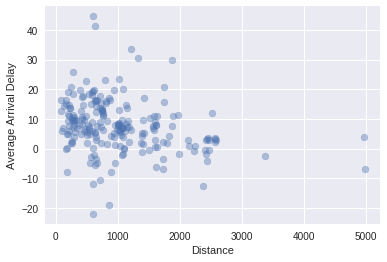

In [239]:
import statsmodels.api as sm
%matplotlib inline

# create a data frame that stores 2 variables: distance and arrival delay
dist_delay = flights_df.groupby('distance', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes distance as predictor, and arrival delay as response
x = dist_delay.distance
y = dist_delay.arr_delay
plt.xlabel("Distance")
plt.ylabel("Average Arrival Delay")
plt.scatter(x, y, alpha=0.4)

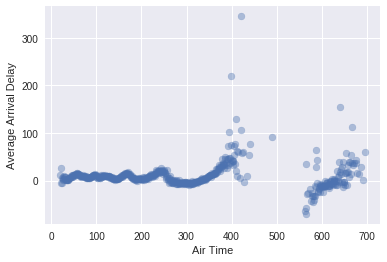

In [240]:
# in the same way, create a data frame that stores 2 variables: air time and arrival delay
dist_delay = flights_df.groupby('air_time', as_index = False)['arr_delay'].mean()

# plot a scatter plot that takes distance as predictor, and arrival delay as response
x = dist_delay.air_time
y = dist_delay.arr_delay
plt.xlabel("Air Time")
plt.ylabel("Average Arrival Delay")
plt.scatter(x, y, alpha=0.4)


Discussion: from these 2 scatter plots we can see that both flying distance and flying time affect the arrival delay time. As the distance increases, the average arrival delay time gets shorter; for flying time between 300 and 400 minutes, the average arrival delay gets longer with the time; also when flying time exceeds 600 minutes, the arrival delay time increases along with the fly time.

# Research Question : Which is the best airline in terms of speed, departure and arrival delay for the year 2013 ?
We can create heatmaps in order to explore this research question.

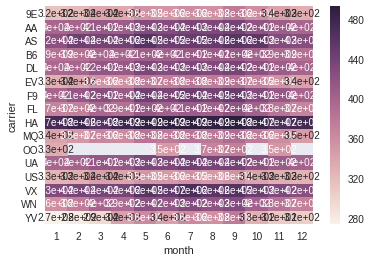

In [292]:
import seaborn as sns
#creating a grouped dataframe by month & carrier
month_carr_df = flights_df.groupby(["month","carrier"],as_index = False).mean()

#creating a speed pivot table
speed_pvt=month_carr_df.pivot("carrier","month","speed")

#creating a heatmap
sns.heatmap(speed_pvt, annot=True)

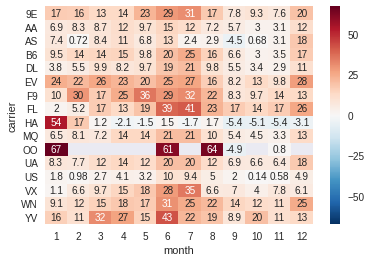

In [242]:
#creating a heat map on dep_delay
dep_pvt=month_carr_df.pivot("carrier","month","dep_delay")

#creating a heatmap
sns.heatmap(dep_pvt, annot=True)

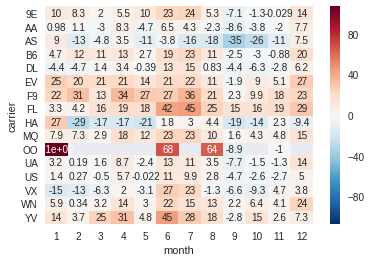

In [243]:
#creating a pivot table on arr_delay
arr_pvt=month_carr_df.pivot("carrier","month","arr_delay")

#creating a heatmap
sns.heatmap(arr_pvt, annot=True)


We can observe that carrier "F9" & "FL" arrive at their destinations late quite frequently. Carrier "HA" performs well again as it arrives at its destination in advance quite frequently. Carrier "AS" also does well in this respect.

### Question: Which of the NYC airports is used most for long-distance flights? What about commuter flights?

origin
EWR    1056.742790
JFK    1266.249077
LGA     779.835671
Name: distance, dtype: float64


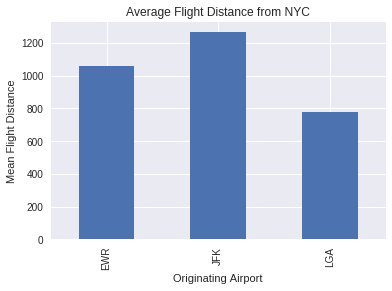

In [244]:
# Group flights_df and apply mean function
flight_dist = flights_df.groupby('origin').mean()

print flight_dist['distance']

# Plot a simple bar chart to see difference in average distance flown from each of the originating airports
flight_dist.distance.plot(kind = 'bar')
plt.xlabel('Originating Airport')
plt.ylabel('Mean Flight Distance')
plt.title(r'Average Flight Distance from NYC')


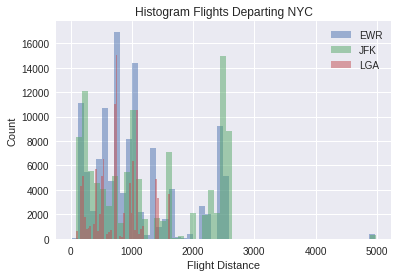

In [245]:
# Create a series containing distance for each of the origin airports by filtering on origin

flights_EWR = flights_df['distance'][flights_df['origin']== 'EWR']
flights_JFK = flights_df['distance'][flights_df['origin']== 'JFK']
flights_LGA = flights_df['distance'][flights_df['origin']== 'LGA']

# Plot a histogram for each of the above series, and overlay on same plot to see comparison
plt.hist(flights_EWR.values, 50, alpha=0.5, label='EWR')

plt.hist(flights_JFK.values, 50, alpha=0.5, label='JFK')

plt.hist(flights_LGA.values, 50, alpha=0.5, label='LGA')

# Add labels for clarity
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing NYC')
plt.legend(loc='upper right')


It appears that each airport has a unique flight distance profile. Newark services a wide range of distances, from 100 to > 2500 miles. There is a bimodal distribution, with a cluster of flights around ~750 miles and ~2500 miles. JFK has a similar spread, but with significantly more flights clustered around ~2600 miles. LaGuardia appears to have a more even distribution around ~ 750 miles, with no clustering above 2000 miles. This suggests that JFK is used the most for long range flights. All 3 airports have significant traffic in the < 1000 mile range. LaGuardia has the lowest average flight distance.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [270]:
#deleting the "Unnamed: 0" column
del weather_df["Unnamed: 0"]

#viewing the data
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date
0,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01
1,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01
2,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01
3,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01
4,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01


In [275]:
#grouping by month on mean values and selecting columns
delay_df = flights_df.groupby(["month"] , as_index = False).mean()[["month",
                                                                    "dep_delay",
                                                                    "arr_delay"]]
delay_df.head(12)

,month,dep_delay,arr_delay
0,1,10.036665,6.129972
1,2,10.816843,5.613019
2,3,13.227076,5.807577
3,4,13.938038,11.176063
4,5,12.986859,3.521509
5,6,20.846332,16.481330
6,7,21.727787,16.711307
7,8,12.611040,6.040652
8,9,6.722476,-4.018364
9,10,6.243988,-0.167063


In [277]:
#grouping by month on mean values and selecting columns
conditions_df = weather_df.groupby(["month"], as_index = False).mean()[["month","temp", "dewp", 
                                                                        "humid", "wind_dir","wind_speed","wind_gust",
                                                                        "precip","pressure","visib"]]
conditions_df.head(12)

,month,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1.0,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2.0,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3.0,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4.0,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5.0,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046
5,6.0,73.249500,60.271500,66.507083,192.200000,9.401233,10.818751,0.007111,1013.587719,9.339583
6,7.0,80.614516,67.522661,66.655108,192.135922,9.002069,10.359401,0.002231,1016.555988,9.590390
7,8.0,74.460054,61.085081,65.577311,194.483734,7.493271,8.623106,0.003576,1016.679063,9.613360
8,9.0,67.366750,53.684750,63.972542,190.286533,7.991528,9.196490,0.001306,1016.959524,9.710764
9,10.0,59.690488,46.948780,65.150542,148.442281,8.156816,9.386701,0.000203,1018.108793,9.470528


In [279]:
#merging the flight & weather conditions data based on month
mean_weather_df = pd.merge(delay_df, conditions_df, on = "month")
mean_weather_df.head(12)

,month,dep_delay,arr_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,10.036665,6.129972,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2,10.816843,5.613019,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3,13.227076,5.807577,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4,13.938038,11.176063,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5,12.986859,3.521509,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046
5,6,20.846332,16.481330,73.249500,60.271500,66.507083,192.200000,9.401233,10.818751,0.007111,1013.587719,9.339583
6,7,21.727787,16.711307,80.614516,67.522661,66.655108,192.135922,9.002069,10.359401,0.002231,1016.555988,9.590390
7,8,12.611040,6.040652,74.460054,61.085081,65.577311,194.483734,7.493271,8.623106,0.003576,1016.679063,9.613360
8,9,6.722476,-4.018364,67.366750,53.684750,63.972542,190.286533,7.991528,9.196490,0.001306,1016.959524,9.710764
9,10,6.243988,-0.167063,59.690488,46.948780,65.150542,148.442281,8.156816,9.386701,0.000203,1018.108793,9.470528


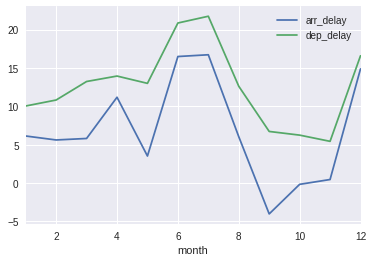

In [293]:

#checking the arrival & departure delay patter for the year
mean_weather_df.plot(x = "month", y =["arr_delay","dep_delay"])

Since the pattern is very similar, we check the correlation value as well.

In [294]:
#checking correlation
mean_weather_df.corr()["arr_delay"]["dep_delay"]

0.93367550245983544

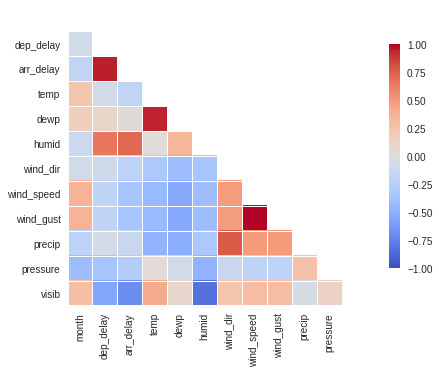

In [306]:
# import seaborn as sns
# sns.set()
# df = sns.load_dataset("iris")
# sns.pairplot(df, hue="species", size=2.5)


import seaborn.linearmodels as sbs
sbs.corrplot(mean_weather_df.pct_change(), annot=False, diag_names=False)

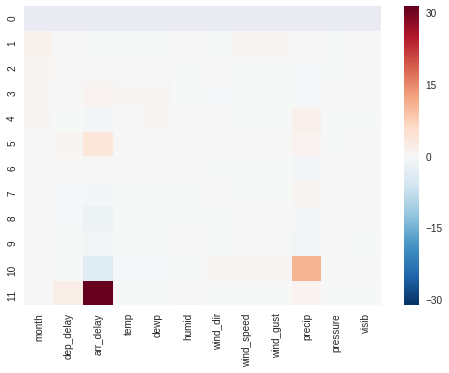

In [307]:
sns.heatmap(mean_weather_df.pct_change(), annot=False)

We can see from the correlation matrix that the "dep_delay" & "arr_delay" have some degree of correlation with "humid" and "dewp". Therefore, plotting these datapoints across the year below.

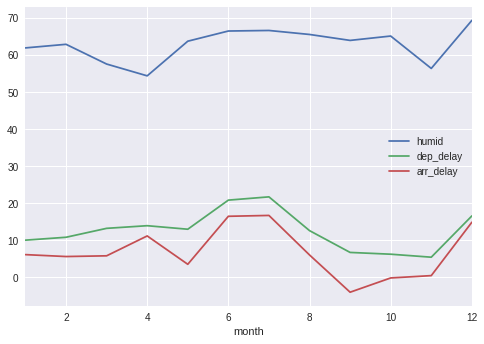

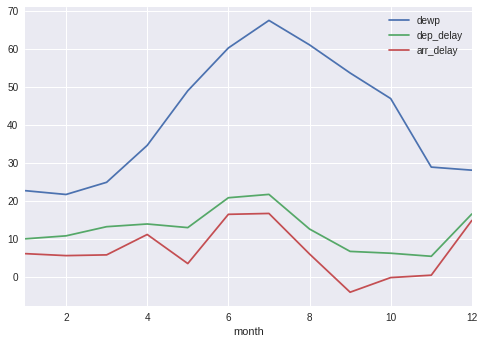

In [308]:
#plotting delay Vs humid & dewp for all months
mean_weather_df.plot(x = "month", y =["humid","dep_delay","arr_delay"])
mean_weather_df.plot(x = "month", y =["dewp","dep_delay","arr_delay"])

We can see that there is an upsurge in both delays after May up until the beginning of September.
We can observe a corresponding upsurge during the same time for humidity & dew point. Infact , dew point shows a spike.
Overall the humidity & dew point tend to follow a similar pattern like that of the delays, which is also evident from the correlation value.

In [310]:
# //////////////////////////////////////////////////////

In [309]:
# merge 2 datasets on joined date_hour column
flights_df['date_time'] = pd.to_datetime(flights_df[['year', 'month', 'day', 'hour']])
weather_df['date_time'] = pd.to_datetime(weather_df[['year', 'month', 'day', 'hour']])
new_df = flights_df.merge(weather_df,on='date_time')
# new_df.head(10)


# 1) Temperature vs. Delay:

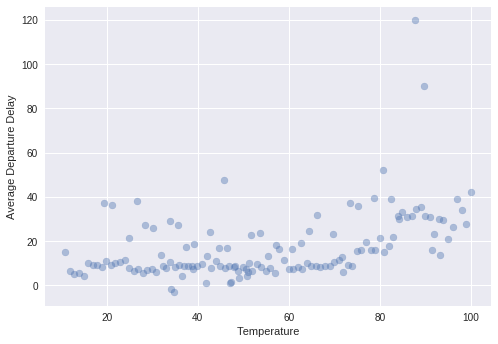

In [313]:
# aggregate average departure delay by temperature
temp_delay = new_df.groupby('temp', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes temperature as predictor, and departure delay as response
plt.xlabel("Temperature")
plt.ylabel("Average Departure Delay")
plt.scatter(temp_delay.temp, temp_delay.dep_delay, alpha=0.4)

# 2) Humidity vs. Delay:

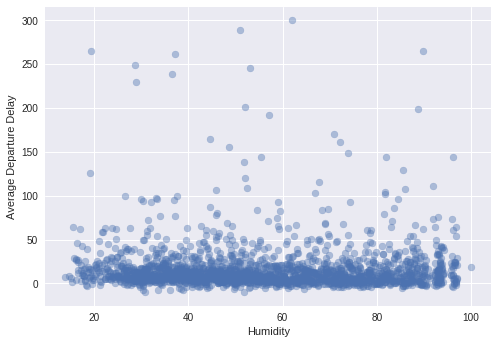

In [314]:

# aggregate average departure delay by humidity
humid_delay = new_df.groupby('humid', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes humidity as predictor, and departure delay as response
plt.xlabel("Humidity")
plt.ylabel("Average Departure Delay")
plt.scatter(humid_delay.humid, humid_delay.dep_delay, alpha=0.4)

  # 3) Wind Direction vs. Delay:

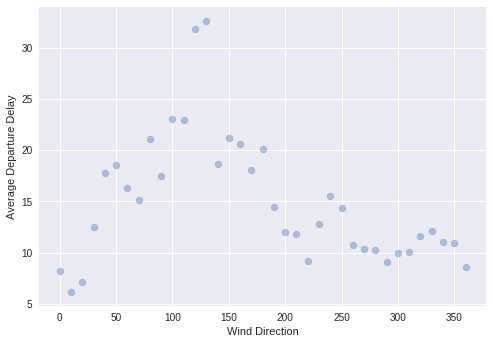

In [315]:

# aggregate average departure delay by wind direction 
dir_delay = new_df.groupby('wind_dir', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind direction as predictor, and departure delay as response
plt.xlabel("Wind Direction")
plt.ylabel("Average Departure Delay")
plt.scatter(dir_delay.wind_dir, dir_delay.dep_delay, alpha=0.4)


# 4) Wind Speed vs. Delay:

(-3, 45)

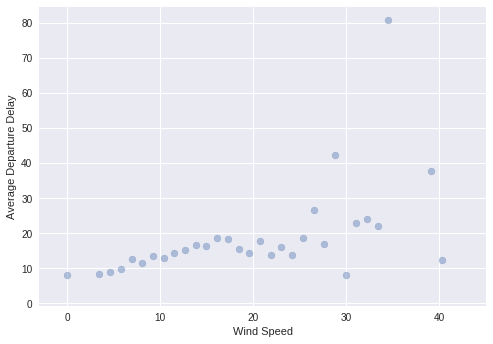

In [317]:
# aggregate average departure delay by wind speed 
speed_delay = new_df.groupby('wind_speed', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind speed as predictor, and departure delay as response
plt.xlabel("Wind Speed")
plt.ylabel("Average Departure Delay")
plt.scatter(speed_delay.wind_speed, speed_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,45)

# 5) Wind Gust vs. Delay:

In [ ]:
# aggregate average departure delay by wind gust
gust_delay = new_df.groupby('wind_gust', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind gust as predictor, and departure delay as response
plt.xlabel("Wind Gust")
plt.ylabel("Average Departure Delay")
plt.scatter(gust_delay.wind_gust, gust_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,50)

# 6) Pressure vs. Delay:

(-15, 130)

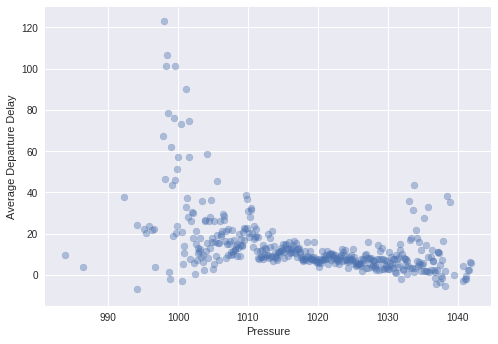

In [319]:
# aggregate average departure delay by pressure
pre_delay = new_df.groupby('pressure', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes the pressure as predictor, and departure delay as response
plt.xlabel("Pressure")
plt.ylabel("Average Departure Delay")
plt.scatter(pre_delay.pressure, pre_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.ylim(-15,130)

# 7) Precipitation vs. Delay

(-0.01, 0.5)

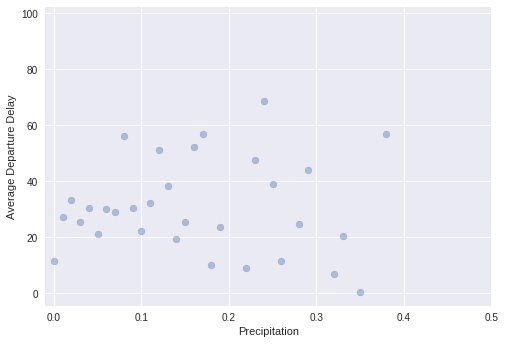

In [320]:
# aggregate average departure delay by precipitation
precip_delay = new_df.groupby('precip', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes the precipitation as predictor, and departure delay as response
plt.xlabel("Precipitation")
plt.ylabel("Average Departure Delay")
plt.scatter(precip_delay.precip, precip_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-0.01,0.5)

# 8) Visibility vs. Delay:

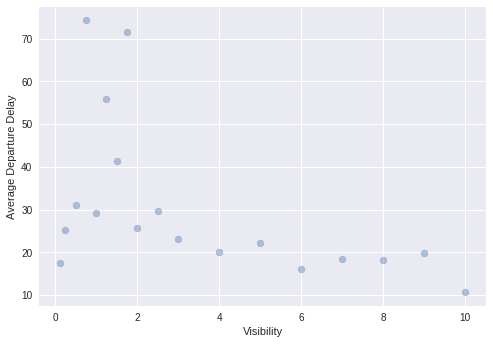

In [318]:
# aggregate average departure delay by visibility
visib_delay = new_df.groupby('visib', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes visibility as predictor, and departure delay as response
plt.xlabel("Visibility")
plt.ylabel("Average Departure Delay")
plt.scatter(visib_delay.visib, visib_delay.dep_delay, alpha=0.4)


Interpretation: from the graphs we can see that overall, temperature, wind speed and wind gust are likely to have a positive effect on the average departure delay. Pressure and visibility are likely to have negative effect on the average departure delay time. wind direction has a positive effect when it's below about 130; and has a negative effect over that number. For humidity and precipitation, I don't see an obvious association from the graph.

In [ ]:
# /////////////////////////////////////////////////////

In [263]:


weather_df= pd.read_csv('weather.csv')
flight_weather_df = pd.merge(flights_df,weather_df,on=['year','month','day','origin','hour'],how="inner")
fw1 = flight_weather_df.loc[(flight_weather_df.dep_delay > 0),["month","day",'hour',"dep_delay",'visib','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure']]
fw2 = fw1.groupby(['month'])['dep_delay','visib','temp','dewp','humid','wind_speed','wind_gust','precip','pressure'].mean()

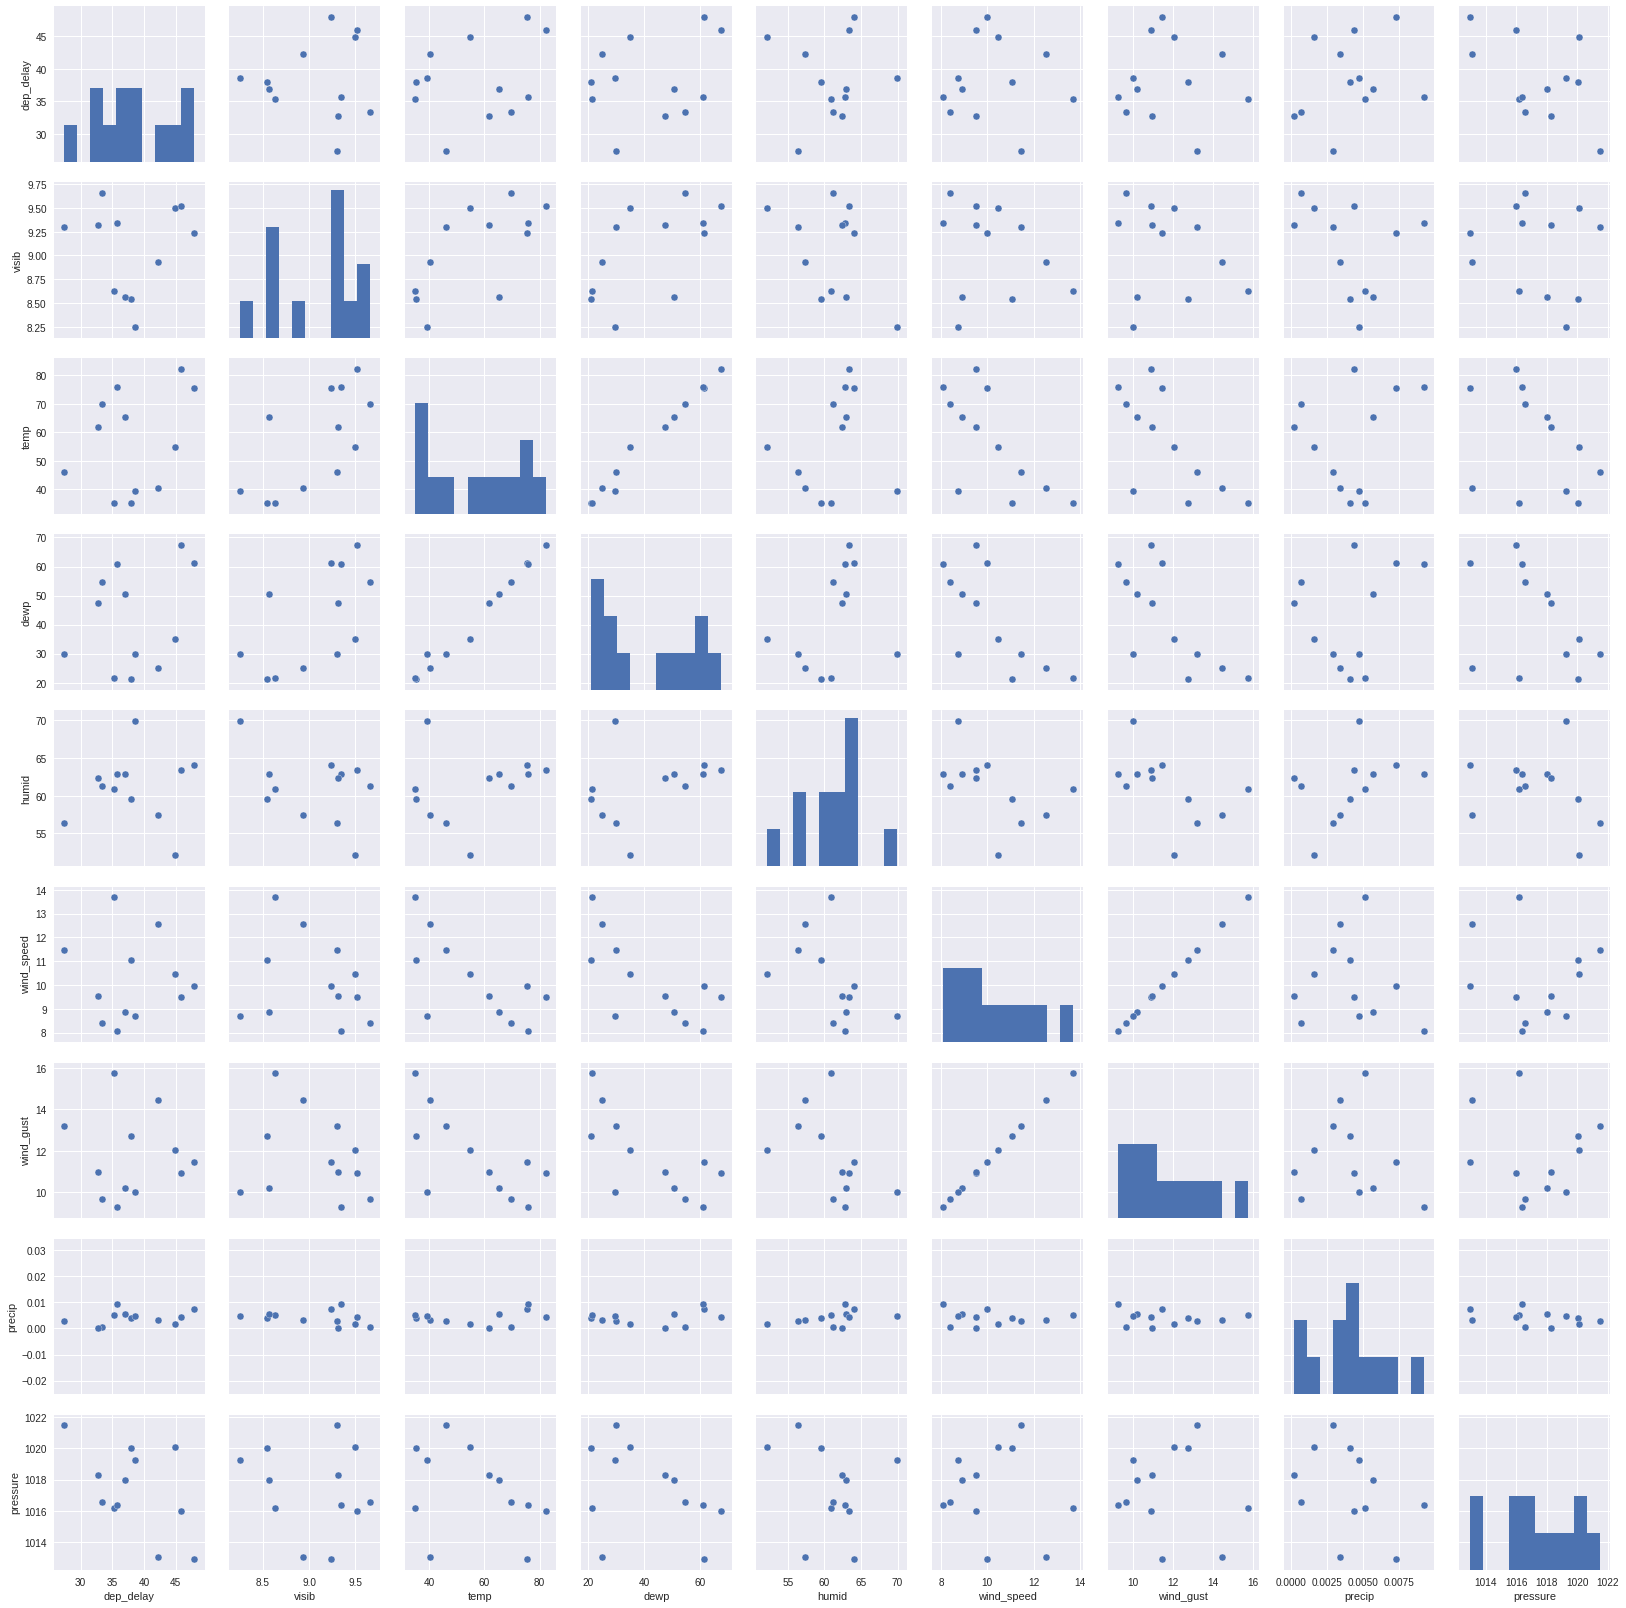

In [264]:

sns.pairplot(fw2)
sns.plt.show()

In [311]:
# //////////////////////////////////////////////

In [266]:
#merging above two data frames using variables year,month and day
merged = pd.merge(flights_df,weather_df, on=['year','month','day'],how='inner')

#slecting relevant columns from the merged dataset
merged = merged[['month','day','dep_delay','temp','humid','wind_dir']]
#discarding all NAs(missing values) from the merged dataset
merged.dropna(subset = ['dep_delay','temp','humid','wind_dir'])

#calculating average monthly temperature
avg_temp = pd.DataFrame(merged.groupby('month')['temp'].mean())
#calculating average monthly departure delay
avg_dep_delay = pd.DataFrame(merged.groupby('month')['dep_delay'].mean())

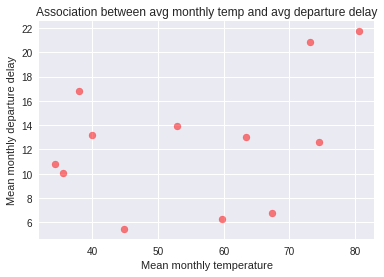

In [267]:

#assigning X as the mean monthly temperature
X = avg_temp['temp']
#assigning Y as the mean monthly departure delay
Y = avg_dep_delay['dep_delay']

#plotting a scatterplot of the values
plt.scatter(X,Y,alpha=0.5, color='red')
plt.xlabel('Mean monthly temperature')
plt.ylabel('Mean monthly departure delay')
plt.title('Association between avg monthly temp and avg departure delay')
plt.show()

Ans: Interpretation: The above scatterplot shows that with increase in average monthly temperature, the aveguare monthly depature of flights increase in an overall fashion, so summer months might account for more delays. While we see that, this could be unexpected as weather conditions like snow or rains during winter would have been more influential in delayed flights status. However, this observation is based off of only one year's (2013) worth of data.

In [312]:
# /////////////////////////////////////////////////////////

In [268]:
# Used weather dataset from R package "nycflights13". Assumes file "weather.csv" is in working dir.
# Reference: https://cran.r-project.org/web/packages/nycflights13/index.html

# Load weather data into df
weather_df = pd.read_csv('weather.csv')

# View dataset datatypes
print weather_df.dtypes

# Look for missing date records
print weather_df[np.isnan(weather_df['month'])]

# Remove missing date records so we can create datetime column 
for col in ['year', 'month', 'day']:
    weather_df = weather_df[weather_df[col].notnull()]

# Check to see if NaNs remain
print weather_df[np.isnan(weather_df['month'])]

# Create date column to join with flights_df date column

weather_df['date'] = pd.to_datetime(weather_df['year'] * 10000 + weather_df['month'].astype(int) * 100 + weather_df['day'].astype(int), format = '%Y%m%d')

# Merge flights_df and weather_df datasets for analysis. Use 'date' and 'hour' fields as keys
flight_weather = pd.merge(flights_df[flights_df['dep_delay'] > 0], weather_df, how='inner', on=['date', 'hour'])



Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object
      Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  \
1630        1631    EWR  2013    NaN  NaN   NaN  44.96  17.96  33.55   

      wind_dir  wind_speed  wind_gust  precip  pressure  visib  
1630      20.0     3.45234   3.972884     0.0    1025.9   10.0  
Empty DataFrame
Columns: [Unnamed: 0, origin, year, month, day, hour, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib]
Index: []


In [248]:
# Look at wind_speed variable
flight_weather.wind_speed.describe()

# Eliminate high outlier record
flight_weather = flight_weather[flight_weather.wind_speed != flight_weather.wind_speed.max()]

# Re-check wind_speed variable 
flight_weather.wind_speed.describe()

count    128071.000000
mean          9.926184
std           5.508442
min           0.000000
25%           5.753900
50%           9.206240
75%          12.658580
max          40.277300
Name: wind_speed, dtype: float64

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     752.6
Date:                Sun, 09 Jul 2017   Prob (F-statistic):           3.39e-45
Time:                        01:51:05   Log-Likelihood:                -359.48
No. Observations:                  90   AIC:                             721.0
Df Residuals:                      89   BIC:                             723.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6233      0.023     27.434      0.0

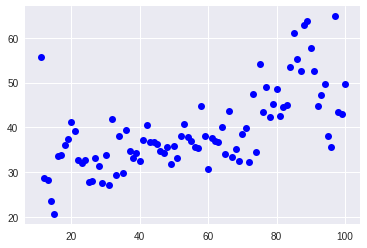

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sun, 09 Jul 2017   Prob (F-statistic):           6.55e-12
Time:                        01:51:05   Log-Likelihood:                -136.60
No. Observations:                  31   AIC:                             275.2
Df Residuals:                      30   BIC:                             276.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7502      0.161     10.855      0.0

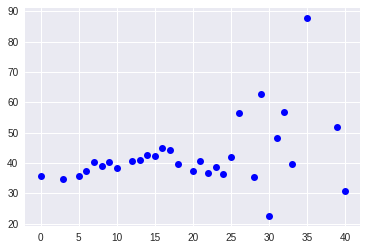

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     17.35
Date:                Sun, 09 Jul 2017   Prob (F-statistic):           0.000230
Time:                        01:51:06   Log-Likelihood:                -178.35
No. Observations:                  32   AIC:                             358.7
Df Residuals:                      31   BIC:                             360.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           168.2158     40.387      4.165      0.0

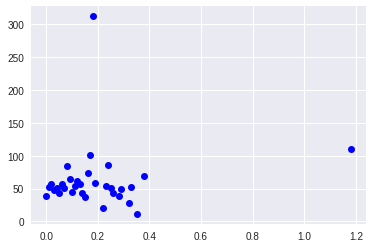

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     11.25
Date:                Sun, 09 Jul 2017   Prob (F-statistic):            0.00377
Time:                        01:51:06   Log-Likelihood:                -94.135
No. Observations:                  18   AIC:                             190.3
Df Residuals:                      17   BIC:                             191.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             7.8059      2.328      3.354      0.0

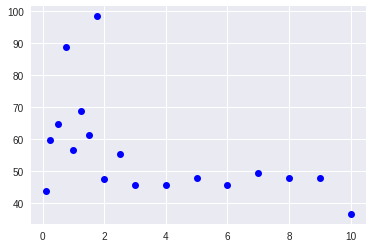

In [249]:
# Round temp and wind_speed values so we can group on them
flight_weather.temp = np.round(flight_weather.temp, 0)
flight_weather.wind_speed = np.round(flight_weather.wind_speed, 0)
# For each of 4 variables of interest (temp, wind speed, precip, visib):
# group by the variable, average the dep_delay, run a OLS regression, scatterplot the results

for i in ['temp', 'wind_speed', 'precip', 'visib']:
    y = flight_weather.groupby(i)['dep_delay'].mean()
    x = y.index
    results = sm.OLS(y, x).fit()
    print results.summary()
    plt.figure()
    plt.plot(x,y,'bo')
    plt.show()

Weather appears to have an effect on the average length of flight delays. Looking at each of Temperature, Wind Speed, Precipitation, and Visibility (the four weather measurements I selected as most interesting to analyze), we see some  relationships. Temperature has a strong relationship with departure delay length, evidenced by a visible linear pattern and a high R-squared value. In this simple linear model, temp explains 89% of the variation in dep_delay. Interestingly, the relationship is positive - higher temperature correlates with higher average delays. This is somewhat surprising, as this analyst would have expected cold temperatures to produce long delays. Wind_speed also appears to have an effect on delay length, though the pattern is not as strong. The R-squared is .79. Precipitation does not appear to be strongly related to departure delay. Visibility shows a relationship with departure delay. As expected, very low visibilities are associated with higher departure delays. For visibility >= 3 miles, there does not appear to be a significant effect on departure delay, as the line is relatively flat.